# LAB 4 : Multi Layered Neural Network and Backpropogation

Name : Hrishikesh Pable

Roll Number : 200010037 

Referrence Material :

Chapter 4:, page no. 106-136, Artificial Neural Network by B. Yegnanarayana

1. https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

2. https://www.geeksforgeeks.org/deep-neural-net-with-forward-and-back-propagation-from-scratch-python/

3. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

4. https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484

Observation to be demonstrated: 

1. Two layer neural network (i.e one output layer) not able to classify non-linearly separable data. Solve the problem by increasing the no. of layer and changing the activation function from hard-limiting to sigmoid. 

2. Similar observations have to be demonstrated for non-convex data.(i.e 3 layer network not able to learn the appropriate separating hyper plane, which being resolved using 4 layer network.) 

3. Show that, using sigmoid activation, the gradient vanishing/ exploding happens during training, try to resolve this problem by changing the activation function.



## Write down the Objectives, Hypothesis and Experimental description for the above problem

### Objectives: 

1. We consider the feedforward neural network with 1,2 and 3 hidden layers and sigmoid and ReLU activation functions. 

2. We first show that the 2-layer network with hard-limiting activation function is not able to classify non-linearly separable data.

3. Then we use a 3-layer network with sigmoid activation function to classify the non-linearly separable data.

4. We then consider a non-convex data and show that the 3-layer network is not able to learn the appropriate separating hyperplane.

5. We then use a 4-layer network to classify the non-convex data.

6. We then show that using sigmoid activation, the gradient vanishing/ exploding happens during training and try to resolve this problem by changing the activation function (to ReLU).

![Neural Network](NN_gfg.png)

## Backpropagation Algorithm

$ \Delta w_{ji}^h (m) = \eta \delta_j^h a_i (m) $

where the backpropagated error $ \delta_j^h $ is given by,

$ \delta_j^h = \dot{f}_j^h \sum_{k=1}^{K} w_{kj} \delta_k^{o} $

In [1]:

import numpy as np
import sklearn.datasets as dt
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
     

(300, 2)
(300,)


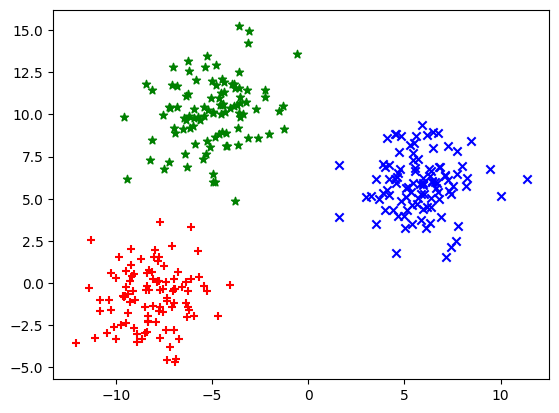

torch.Size([300, 2])
torch.Size([300])


In [2]:
## Write your code here

def NonLinearData():

  u1 = np.array([-8,-1])
  u2 = np.array([-5,10])
  u3 = np.array([6,6])
  
  v1 = v2 = v3 = np.array([[3,0],[0,3]])
  
  c1 = np.random.multivariate_normal(u1,v1,100)
  c2 = np.random.multivariate_normal(u2,v2,100)
  c3 = np.random.multivariate_normal(u3,v3,100)
  
  data_k = c1
  data_k = np.append(data_k,c2, axis=0)
  data_k = np.append(data_k,c3, axis=0)

  print(data_k.shape)
  

  y1 = np.zeros(100)
  y2 = np.ones(100)
  y3 = np.add(np.ones(100),np.ones(100))

  labels = y1
  labels = np.append(labels,y2,axis=0)
  labels = np.append(labels,y3,axis=0)

  print(labels.shape)

  plt.scatter(c1[:,0], c1[:,1],marker = '+',color='r')
  plt.scatter(c2[:,0], c2[:,1],marker = '*',color='g')
  plt.scatter(c3[:,0], c3[:,1],marker = 'x',color='b')
  plt.show()

  return data_k,labels

x1,label1 = NonLinearData()
x1 = torch.tensor(x1)
label1 = torch.tensor(label1)

print(x1.shape)
print(label1.shape)

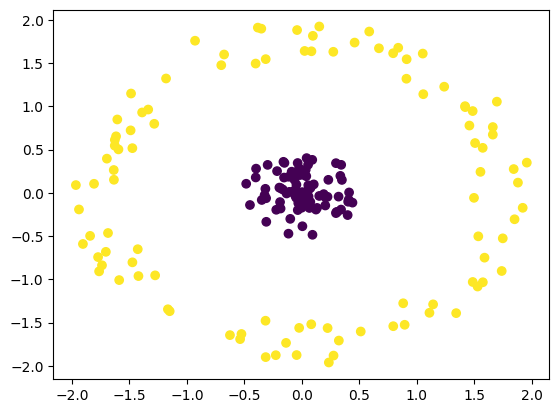

torch.Size([200, 2])
torch.Size([200])


In [3]:
def NonConvexData():

  # x,label = dt.make_circles(factor = 0.4)
  # my_scatter_plot = plt.scatter(x[:, 0], x[:, 1], c=label, vmin=min(label), vmax=max(label))
  
  # Manually generate non-convex data
  num_samples = 200
  x = np.zeros((num_samples, 2))
  label = np.zeros(num_samples)
  for i in range(num_samples):
    r = np.random.rand()
    theta = np.random.rand() * 2 * np.pi
    if r < 0.5:
      x[i, 0] = r * np.cos(theta)
      x[i, 1] = r * np.sin(theta)
      label[i] = 0
    else:
      x[i, 0] = (r + 1) * np.cos(theta)
      x[i, 1] = (r + 1) * np.sin(theta)
      label[i] = 1
  plt.scatter(x[:, 0], x[:, 1], c=label, vmin=min(label), vmax=max(label))

  plt.show()

  return x,label

x,label = NonConvexData()
x = torch.tensor(x)
label = torch.tensor(label)

print(x.shape)
print(label.shape)


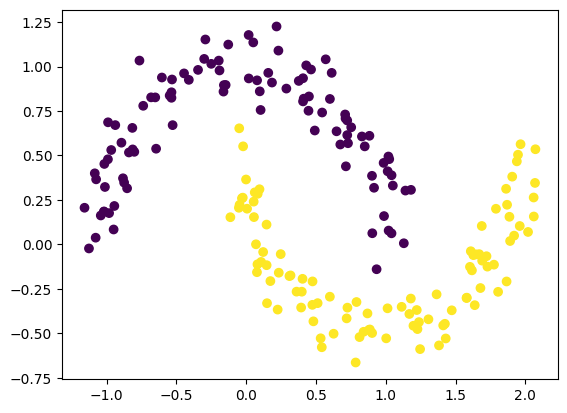

torch.Size([200, 2])
torch.Size([200])


In [4]:


def Non_Convex_Data():
  # Create 2 semi-circles, ensuring that they are not linearly separable
  x, y = dt.make_moons(n_samples=200, noise=0.1)
  
  return x, y

x_moon,y_moon = Non_Convex_Data()

plt.scatter(x_moon[:,0], x_moon[:,1], c=y_moon, vmin=min(y_moon), vmax=max(y_moon))
plt.show()

x_moon = torch.tensor(x_moon)
y_moon = torch.tensor(y_moon)

print(x_moon.shape)
print(y_moon.shape)
     

In [5]:

def TwoLayerNet(X,Y):

  X = X.double()
  Y = Y.double()
  lr = 0.01
  w = torch.randn(X.shape[1]).reshape(X.shape[1],1).double()
  #b = 0
  err = []
  max_epochs = 100
  for eps in range(max_epochs):
    
    a = torch.matmul(X,w)
    val = []

    for i in range(len(a)):
      if a[i]>0:
         val.append(1)
      else:
         val.append(0)
    val = torch.tensor(val)
    
    delta = (Y - val).reshape(Y.shape[0],1)
    error =  torch.sum(torch.abs(delta))
    w += lr*(torch.matmul(X.T,delta))
    

    err.append(error)

  plt.plot(err)
  plt.show()
  print(w) 
  return err,w






In [6]:

label = label.reshape([label.shape[0],1])
dataset = np.concatenate([x,label],axis=-1)
print(dataset.shape)

dataset = dataset.tolist()

(200, 3)


In [7]:
label1 = label1.reshape([label1.shape[0],1])
dataset1 = np.concatenate([x1,label1],axis=-1)
print(dataset1.shape)

dataset1 = dataset1.tolist()

(300, 3)


In [8]:
label_moon = y_moon.reshape([y_moon.shape[0],1])
dataset_moon = np.concatenate([x_moon,label_moon],axis=-1)
dataset_moon.shape

dataset_moon = dataset_moon.tolist()

In [9]:
from math import exp
from random import seed
from random import random



# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs, num_layers):
	
	if(num_layers == 1):
		network = list()
		hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
		network.append(hidden_layer)
		output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
		network.append(output_layer)
		return network

	if(num_layers == 2):
		network = list()
		hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
		network.append(hidden_layer)
		hidden_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_hidden)]
		network.append(hidden_layer)
		output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
		network.append(output_layer)
		return network

	if(num_layers == 3):
		network = list()
		hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
		network.append(hidden_layer)
		hidden_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_hidden)]
		network.append(hidden_layer)
		hidden_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_hidden)]
		network.append(hidden_layer)
		output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
		network.append(output_layer)
		return network
 
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation
 

def transfer(activation,f):
  if f == 'ReLU':
    
    if activation > 0:
      return activation
    else:
      return 0

  if f == 'Sigmoid':
    return 1.0 / (1.0 + exp(-activation))
  
  if f == 'None':
    if activation>0:
      return 1
    else:
      return 0

def transfer_derivative(output,f):
  
  if f == 'ReLU':
    
    if output<=0:
      output = 0
    else:
      output = 1
    return output
  
  if f == 'Sigmoid':
    return output*(1.0-output)
  
  if f == 'None':
    return 0

# Forward propagate input to a network output
def forward_propagate(network, row,f):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation,f)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
 
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected,f):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'],f)

# Update network weights with error
def update_weights(network, row, l_rate,f):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']
 
## Train

def train_network(network,train,l_rate,n_epoch,n_outputs,f):
  err = []
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
      outputs = forward_propagate(network,row,f)
      expected = [0 for i in range(n_outputs)]
      expected[int(row[-1])] = 1
      sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
      backward_propagate_error(network,expected,f)
      update_weights(network,row,l_rate,f)
    #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    err.append(sum_error)
  
  return err


torch.Size([300, 2])
torch.Size([300, 1])


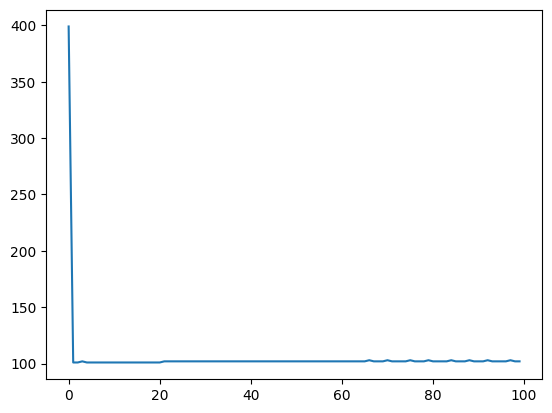

tensor([[589.8226],
        [649.3212]], dtype=torch.float64)
tensor([[589.8226],
        [649.3212]], dtype=torch.float64)


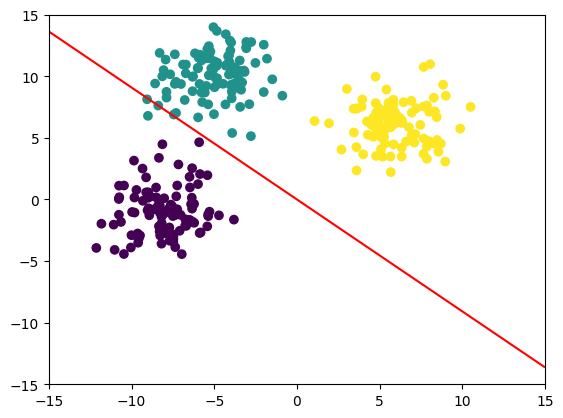

In [16]:
#Use the two layer network to classify the non-linearly seperable data
seed(1)
n_inputs = len(dataset1[0]) - 1
n_outputs = len(set([row[-1] for row in dataset1]))
#Use the Twolayer net

print(x1.shape)
print(label1.shape)

label1 = label1.reshape([label1.shape[0]])

err, w = TwoLayerNet(x1,label1)
print(w)

#Plot the decision boundary
x_plot = np.linspace(-15, 15, 200)
y_plot = np.linspace(-15, 15, 200)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
Z_plot = np.zeros(X_plot.shape)
for i in range(X_plot.shape[0]):
    for j in range(X_plot.shape[1]):
        Z_plot[i, j] = w[0] * X_plot[i, j] + w[1] * Y_plot[i, j]

plt.contour(X_plot, Y_plot, Z_plot, levels=[0], colors='r')
plt.scatter(x1[:,0], x1[:,1], c=label1, vmin=min(label1), vmax=max(label1))
plt.show()


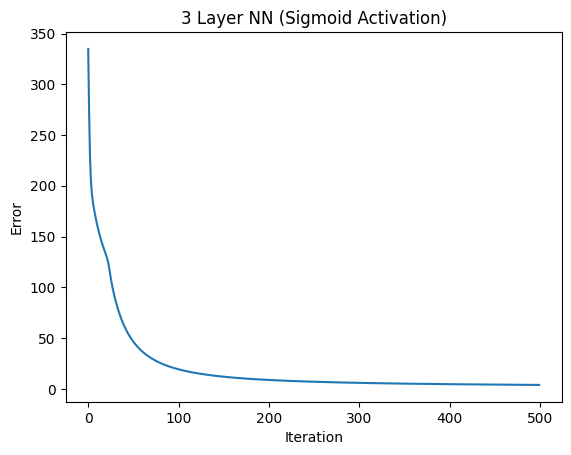

tensor(-13.1368, dtype=torch.float64) tensor(11.4975, dtype=torch.float64)


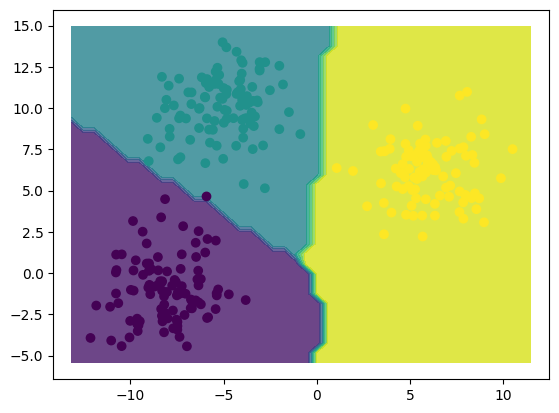

In [23]:
seed(1)
n_inputs = len(dataset1[0]) - 1
n_outputs = len(set([row[-1] for row in dataset1]))
network = initialize_network(n_inputs,2, n_outputs,1)

# for layer in network:
# 	print(layer)

f = 'Sigmoid'
err = train_network(network, dataset1, 0.01, 500, n_outputs,f)
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('3 Layer NN (Sigmoid Activation)')
plt.show()




# Plot the decision boundary
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
print(x_min,x_max)
# Keep the distance between the points to be a little higher as the x_min and x_max are very far apart
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.6), np.arange(y_min, y_max, 0.6))
# print(np.c_[xx.ravel(), yy.ravel()].tolist())
# Z = np.array(forward_propagate(network,np.c_[xx.ravel(), yy.ravel()].tolist(),f))
#Pass the input through the network one by one
Z = []
for i in np.c_[xx.ravel(), yy.ravel()].tolist():
  Z.append(forward_propagate(network,i,f))
# Z = np.array(Z).reshape(xx.shape)
# Take the argmax to obtain the predicted class
# print(Z)
Z = np.argmax(Z, axis=1)
# print(Z)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x1[:, 0], x1[:, 1], c=label1, vmin=min(label1), vmax=max(label1))
plt.xlim(xx.min()-1, xx.max()+1)
plt.ylim(yy.min()-1, yy.max()+1)
plt.show()

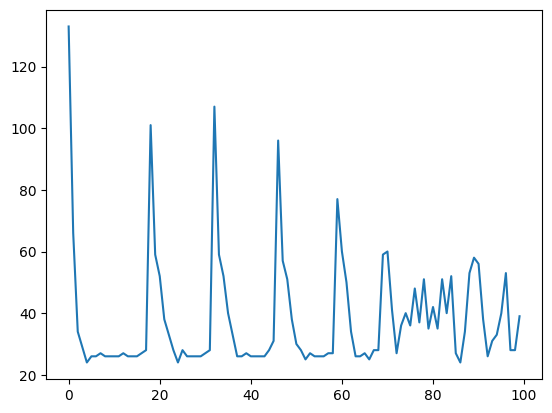

tensor([[ 0.3436],
        [-0.1283]], dtype=torch.float64)


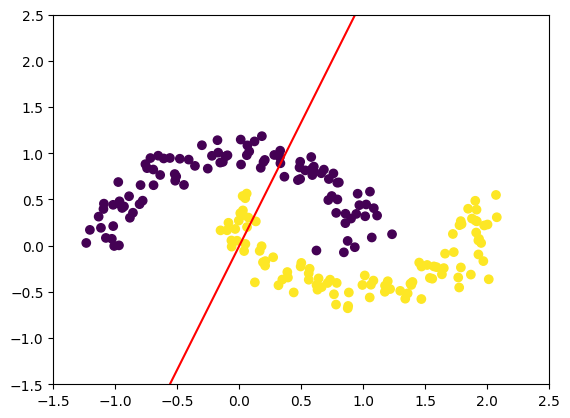

In [24]:
err,w = TwoLayerNet(x_moon,y_moon)


# Plot the decision boundary
x_plot = np.linspace(-1.5, 2.5, 200)
y_plot = np.linspace(-1.5, 2.5, 200)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
Z_plot = np.zeros(X_plot.shape)
for i in range(X_plot.shape[0]):
    for j in range(X_plot.shape[1]):
        Z_plot[i, j] = w[0] * X_plot[i, j] + w[1] * Y_plot[i, j]
        
plt.contour(X_plot, Y_plot, Z_plot, levels=[0], colors='r')
plt.scatter(x_moon[:,0], x_moon[:,1], c=y_moon, vmin=min(y_moon), vmax=max(y_moon))
plt.show()

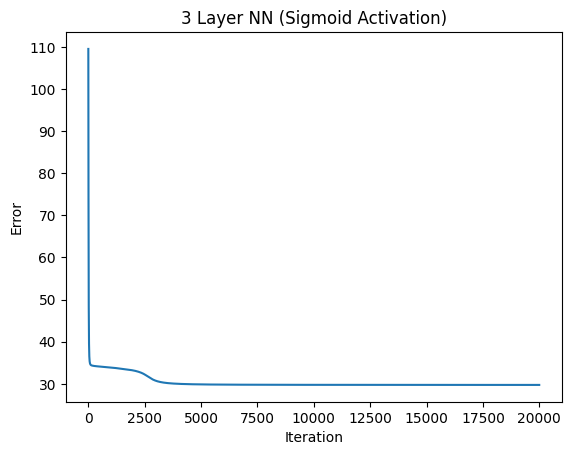

[{'weights': [-0.1072336893565484, 2.4364648758693597, 0.27676141063808984], 'output': 0.2962720968303989, 'delta': -0.006199916535739665}, {'weights': [11.285129103116386, -4.836712189102959, -18.34907832929238], 'output': 0.00610093934552609, 'delta': 0.00014272030617670263}]
[{'weights': [9.42987945201158, -7.4638424849476, -5.91249144405956], 'output': 0.04053803606723004, 'delta': -0.00157671490137599}, {'weights': [-9.429879357608494, 7.463885024620237, 5.912491307948085], 'output': 0.9594619698219675, 'delta': 0.0015767144529367414}]


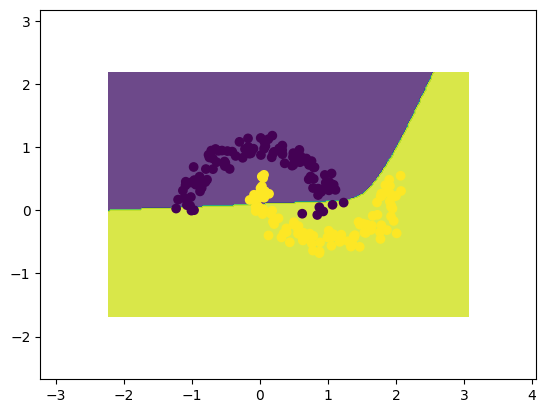

In [25]:
seed(1)
n_inputs = len(dataset_moon[0]) - 1
n_outputs = len(set([row[-1] for row in dataset_moon]))
network = initialize_network(n_inputs,2, n_outputs,1)

# for layer in network:
# 	print(layer)

f = 'Sigmoid'
err = train_network(network, dataset_moon, 0.05, 20000, n_outputs,f)
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('3 Layer NN (Sigmoid Activation)')
plt.show()

for layer in network:
  print(layer)


# Plot the decision boundary
x_min, x_max = x_moon[:, 0].min() - 1, x_moon[:, 0].max() + 1
y_min, y_max = x_moon[:, 1].min() - 1, x_moon[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# print(np.c_[xx.ravel(), yy.ravel()].tolist())
# Z = np.array(forward_propagate(network,np.c_[xx.ravel(), yy.ravel()].tolist(),f))
#Pass the input through the network one by one
Z = []
for i in np.c_[xx.ravel(), yy.ravel()].tolist():
  Z.append(forward_propagate(network,i,f))
# Z = np.array(Z).reshape(xx.shape)
# Take the argmax to obtain the predicted class
# print(Z)
Z = np.argmax(Z, axis=1)
# print(Z)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x_moon[:, 0], x_moon[:, 1], c=y_moon, vmin=min(y_moon), vmax=max(y_moon))
plt.xlim(xx.min()-1, xx.max()+1)
plt.ylim(yy.min()-1, yy.max()+1)
plt.show()

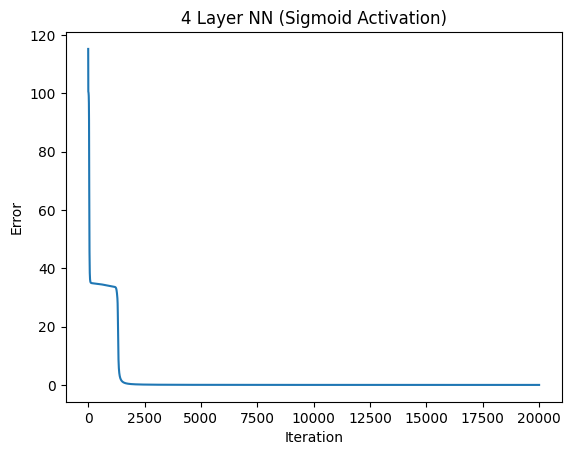

[{'weights': [-5.594256790698668, 5.845627369857191, 6.563161351537768], 'output': 0.18628550661720406, 'delta': -1.3717409885469362e-05}, {'weights': [8.451404268842516, 3.89599919191604, -4.3519796106106625], 'output': 0.9151453296347117, 'delta': -7.274082479222777e-06}, {'weights': [-6.223376186670076, 4.537645453274107, -4.262063972725439], 'output': 4.254011134531809e-06, 'delta': -3.4638802601647735e-10}]
[{'weights': [-2.5105096678352576, -2.3095908695960823, -2.146889609083695, 3.549502829143736], 'output': 0.7247626214598757, 'delta': 6.096461736738815e-06}, {'weights': [5.27372110976386, 5.8058002094977, 5.43041872172964, -7.942611106887278], 'output': 0.16151231393972515, 'delta': -7.92870277644573e-06}, {'weights': [4.738170319851346, 4.764363382507058, 3.589192046668541, -6.773212994871374], 'output': 0.177926434628866, 'delta': -7.043912638064744e-06}]
[{'weights': [-4.526516623619218, 8.936447735841874, 7.283669825081218, -5.7614236309891265], 'output': 0.00182787860419

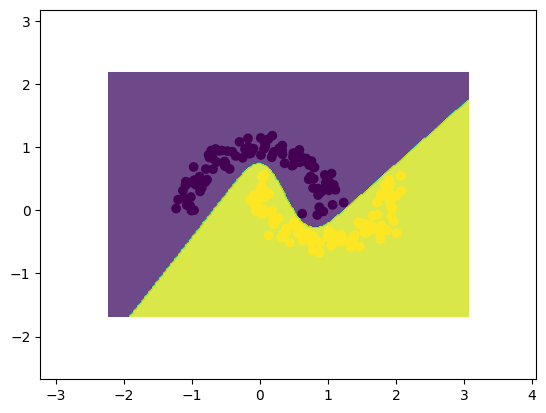

In [21]:
seed(1)
n_inputs = len(dataset_moon[0]) - 1
n_outputs = len(set([row[-1] for row in dataset_moon]))
network = initialize_network(n_inputs,3, n_outputs,2)

# for layer in network:
# 	print(layer)

f = 'Sigmoid'
err = train_network(network, dataset_moon, 0.05, 20000, n_outputs,f)
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('4 Layer NN (Sigmoid Activation)')
plt.show()

for layer in network:
  print(layer)


# Plot the decision boundary
x_min, x_max = x_moon[:, 0].min() - 1, x_moon[:, 0].max() + 1
y_min, y_max = x_moon[:, 1].min() - 1, x_moon[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# print(np.c_[xx.ravel(), yy.ravel()].tolist())
# Z = np.array(forward_propagate(network,np.c_[xx.ravel(), yy.ravel()].tolist(),f))
#Pass the input through the network one by one
Z = []
for i in np.c_[xx.ravel(), yy.ravel()].tolist():
  Z.append(forward_propagate(network,i,f))
# Z = np.array(Z).reshape(xx.shape)
# Take the argmax to obtain the predicted class
# print(Z)
Z = np.argmax(Z, axis=1)
# print(Z)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x_moon[:, 0], x_moon[:, 1], c=y_moon, vmin=min(y_moon), vmax=max(y_moon))
plt.xlim(xx.min()-1, xx.max()+1)
plt.ylim(yy.min()-1, yy.max()+1)
plt.show()

### Vanishing Gradients Problem

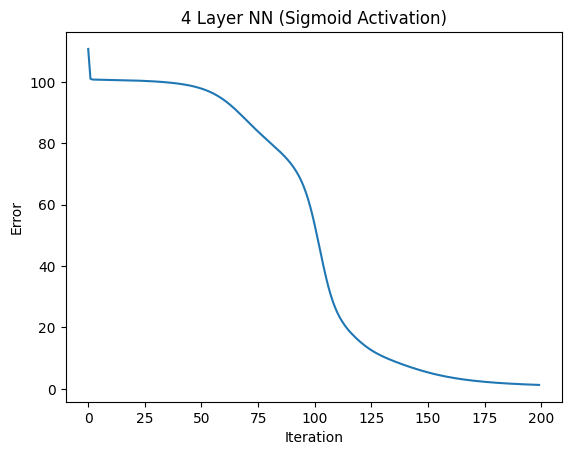

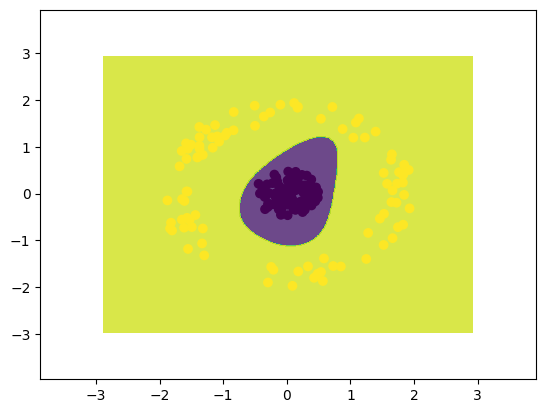

In [54]:

## With Sigmoid
seed(5)
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs,3, n_outputs,2)

# for layer in network:
# 	print(layer)

f = 'Sigmoid'
err = train_network(network, dataset, 0.06, 200, n_outputs,f)
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('4 Layer NN (Sigmoid Activation)')
plt.show()






# Plot the decision boundary which is not linear
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
# print(x_min,x_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# print(np.c_[xx.ravel(), yy.ravel()].tolist())
# Z = np.array(forward_propagate(network,np.c_[xx.ravel(), yy.ravel()].tolist(),f))
#Pass the input through the network one by one
Z = []
for i in np.c_[xx.ravel(), yy.ravel()].tolist():
  Z.append(forward_propagate(network,i,f))
# Z = np.array(Z).reshape(xx.shape)
# Take the argmax to obtain the predicted class
# print(Z)
Z = np.argmax(Z, axis=1)
# print(Z)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=label, vmin=min(label), vmax=max(label))
plt.xlim(xx.min()-1, xx.max()+1)
plt.ylim(yy.min()-1, yy.max()+1)
plt.show()


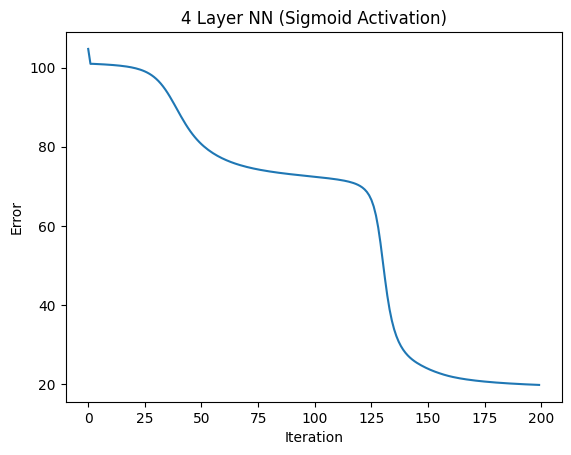

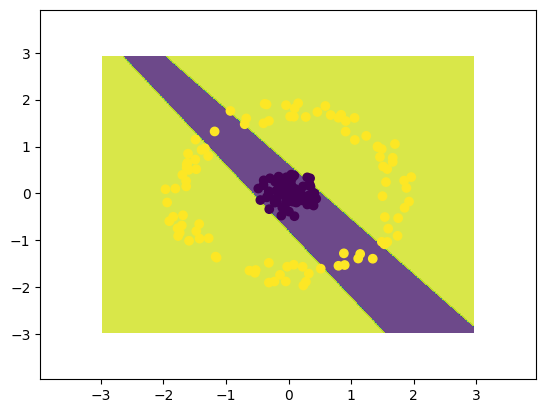

In [11]:

## With Sigmoid
seed(5)
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs,2, n_outputs,2)

# for layer in network:
# 	print(layer)

f = 'Sigmoid'
err = train_network(network, dataset, 0.1, 200, n_outputs,f)
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('4 Layer NN (Sigmoid Activation)')
plt.show()






# Plot the decision boundary which is not linear
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
# print(x_min,x_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# print(np.c_[xx.ravel(), yy.ravel()].tolist())
# Z = np.array(forward_propagate(network,np.c_[xx.ravel(), yy.ravel()].tolist(),f))
#Pass the input through the network one by one
Z = []
for i in np.c_[xx.ravel(), yy.ravel()].tolist():
  Z.append(forward_propagate(network,i,f))
# Z = np.array(Z).reshape(xx.shape)
# Take the argmax to obtain the predicted class
# print(Z)
Z = np.argmax(Z, axis=1)
# print(Z)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=label, vmin=min(label), vmax=max(label))
plt.xlim(xx.min()-1, xx.max()+1)
plt.ylim(yy.min()-1, yy.max()+1)
plt.show()


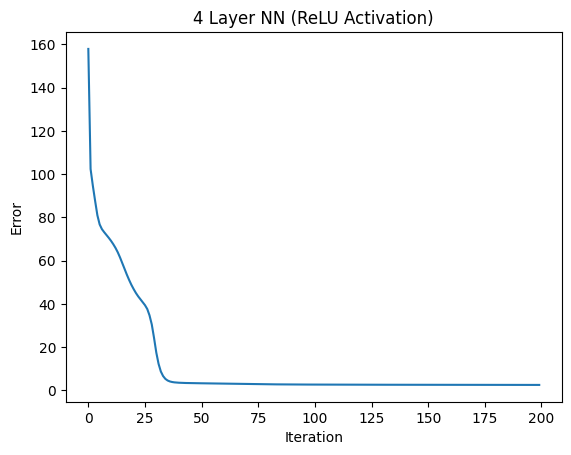

tensor(-2.8774, dtype=torch.float64) tensor(2.9309, dtype=torch.float64)


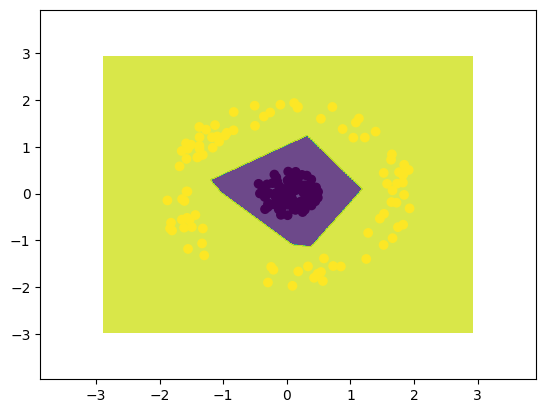

In [43]:
seed(1)
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs,3, n_outputs,2)

# for layer in network:
# 	print(layer)

f = 'ReLU'
err = train_network(network, dataset, 0.01, 200, n_outputs,f)
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('4 Layer NN (ReLU Activation)')
plt.show()

# Plot the decision boundary which is not linear
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
print(x_min,x_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# print(np.c_[xx.ravel(), yy.ravel()].tolist())
# Z = np.array(forward_propagate(network,np.c_[xx.ravel(), yy.ravel()].tolist(),f))
#Pass the input through the network one by one
Z = []
for i in np.c_[xx.ravel(), yy.ravel()].tolist():
  Z.append(forward_propagate(network,i,f))
# Z = np.array(Z).reshape(xx.shape)
# Take the argmax to obtain the predicted class
# print(Z)
Z = np.argmax(Z, axis=1)
# print(Z)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=label, vmin=min(label), vmax=max(label))
plt.xlim(xx.min()-1, xx.max()+1)
plt.ylim(yy.min()-1, yy.max()+1)
plt.show()

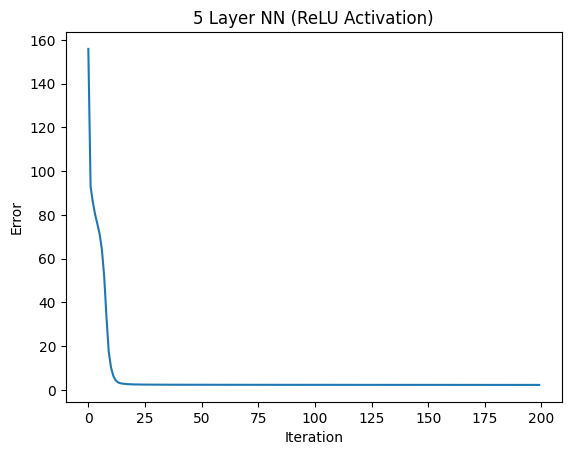

tensor(-2.8774, dtype=torch.float64) tensor(2.9309, dtype=torch.float64)


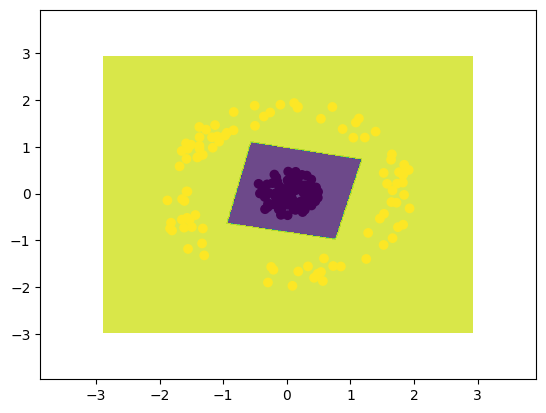

In [47]:
seed(1)
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs,3, n_outputs, 3)

# for layer in network:
# 	print(layer)

f = 'ReLU'
err = train_network(network, dataset, 0.01, 200, n_outputs,f)
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('5 Layer NN (ReLU Activation)')
plt.show()

# Plot the decision boundary which is not linear
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
print(x_min,x_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# print(np.c_[xx.ravel(), yy.ravel()].tolist())
# Z = np.array(forward_propagate(network,np.c_[xx.ravel(), yy.ravel()].tolist(),f))
#Pass the input through the network one by one
Z = []
for i in np.c_[xx.ravel(), yy.ravel()].tolist():
  Z.append(forward_propagate(network,i,f))
# Z = np.array(Z).reshape(xx.shape)
# Take the argmax to obtain the predicted class
# print(Z)
Z = np.argmax(Z, axis=1)
# print(Z)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=label, vmin=min(label), vmax=max(label))
plt.xlim(xx.min()-1, xx.max()+1)
plt.ylim(yy.min()-1, yy.max()+1)
plt.show()

## Observations and Conclusions:

1. The 2-layer network with hard-limiting activation function is not able to classify non-linearly separable data.

2. The 3-layer network with sigmoid activation function is able to classify the non-linearly separable data.

3. The 3-layer network is not able to learn the appropriate separating hyperplane for non-convex data.

4. The 4-layer network is able to classify the non-convex data.

5. Using sigmoid activation, the gradient vanishing/ exploding happens during training and this problem is resolved by changing the activation function to ReLU.

6. The ReLU activation function is able to resolve the problem of gradient vanishing/ exploding.

7. Adding more layers after 4 layers just increases the complexity of the model and makes the classification more precise, but it does not change the overall characteristics of model's classification.